<a href="https://colab.research.google.com/github/gracejeffery/my-code/blob/main/GraceJeffery_Project3_RecommendationSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Amazon Product Recommendation System**

# Grace Jeffery


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [ ]:
# Installing surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811590 sha256=ac80827aeafba65d67ccf51c527908825becffa056b4eff85b9dce56cd83e584
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# libraries for data processing
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# A dictionary output that does not raise a key error
from collections import defaultdict

# ignores warnings
import warnings
warnings.filterwarnings('ignore')

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [ ]:
# loading the amazon user/product data frame
data = pd.read_csv('/content/drive/MyDrive/data science MIT <3/ratings_Electronics.csv')

In [ ]:
# check the first five rows
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


The data frame does not have proper column names.

In [ ]:
# checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   AKM1MP6P0OYPR  object 
 1   0132793040     object 
 2   5.0            float64
 3   1365811200     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


* user id and product id are objects
* rating is a float
* timestamp is an integer

The data has 4 columns and 7,824,481 rows!

In [ ]:
# naming the columns
data.columns =['user_id', 'prod_id', 'rating', 'timestamp']

In [ ]:
# dropping the timestamp column as it is unnecessary for building recommendation system
data = data.drop(columns='timestamp')

In [ ]:
# check the data to ensure all updates have been made correctly
data

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824477,A322MDK0M89RHN,BT008UKTMW,5.0
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [ ]:
# create a copy of the data
df = data.copy()

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [ ]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [ ]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0


We have modified the original data set to now only include:
* users who have given at least 50 ratings
* products that have at least 5 ratings.

## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [ ]:
# Check the number of rows and columns
df_final.shape

(65290, 3)

** The data set has 3 columns (user_id, prod_id, and rating) and 65,290 rows.

### **Data types**

In [ ]:
# Check Data types
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65290 entries, 1309 to 7824426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


* user id and product id are objects
* rating is a float

### **Checking for missing values**

In [ ]:
# Check for missing values present
df_final.isnull().values.any()

False

There are no missing values.

### **Summary Statistics**

In [ ]:
# Summary statistics of 'rating' variable
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,65290.0,4.294808,0.988915,1.0,4.0,5.0,5.0,5.0


* The average rating is 4.29
* The minimum rating is 1.0
* The median and maximum rating is 5.0

This means over 50% of the ratings are a 5.0.

### **Checking the rating distribution**

[Text(0.5, 1.0, 'Number of Ratings')]

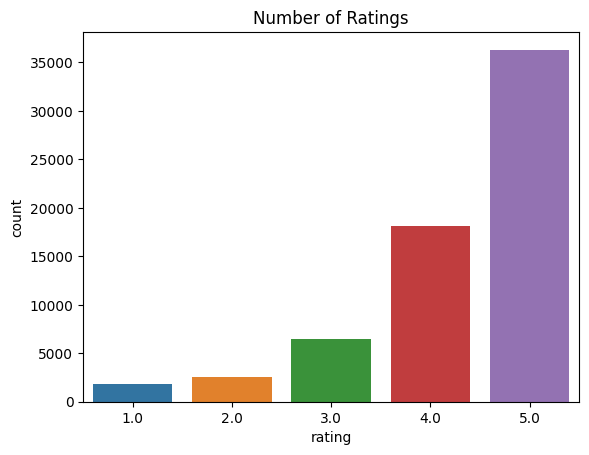

In [ ]:
# Creates count plot for each rating
sns.countplot(data = df_final, x = 'rating').set(title = 'Number of Ratings')

There are far more high ratings than low ratings.
The majority of ratings are 5.0.

### **Checking the number of unique users and items in the dataset**

In [ ]:
# number of unique user id and product id in the data
df_final.nunique()

user_id    1540
prod_id    5689
rating        5
dtype: int64

In [ ]:
# total number of users, products, and ratings
df_final.count()

user_id    65290
prod_id    65290
rating     65290
dtype: int64

There are 65,290 rows in the data.
* 1540 unique users
* 5689 unique products

### **Users with the most number of ratings**

In [ ]:
# Top 10 users based on the number of ratings
# First count the number of ratings each user has
top_ten_users = df_final.value_counts('user_id')

# Then print the top 10
top_ten_users.head(10)

user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A22CW0ZHY3NJH8    193
A1UQBFCERIP7VJ    193
AWPODHOB4GFWL     184
A3LGT6UZL99IW1    179
dtype: int64

The top ten users have rating counts between 179 and 295.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [ ]:
# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id').mean()['rating']

# Calculate the count of ratings for each product
rating_count = df_final.groupby('prod_id').count()['rating']

# Create a dataframe with calculated average and count of ratings
ratings = pd.DataFrame({'average_rating':average_rating, 'rating_count':rating_count})

# Sort the dataframe by average of ratings in the descending order
ratings.sort_values(by=['average_rating'], ascending=False)

# See the first five records of the "ratings" dataset
ratings.head(5)


,average_rating,rating_count
prod_id,,
1400501466,3.333333,6
1400532655,3.833333,6
1400599997,4.000000,5
9983891212,4.875000,8
B00000DM9W,5.000000,5


In [ ]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_products(data, n, min_interactions=100):

    # Finding products with minimum number of interactions
    recommendations = data[data['rating_count'] > min_interactions]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by='average_rating', ascending=False)

    return recommendations.index[:n]

### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [ ]:
# using top_products function to find the top 5 products with 50+ ratings
top_five_fifty = list(top_products(ratings, 5, 50))
top_five_fifty

['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

In [ ]:
# check each product recommendation
ratings.loc['B001TH7GUU']

average_rating     4.871795
rating_count      78.000000
Name: B001TH7GUU, dtype: float64

In [ ]:
ratings.loc['B003ES5ZUU']

average_rating      4.86413
rating_count      184.00000
Name: B003ES5ZUU, dtype: float64

In [ ]:
ratings.loc['B0019EHU8G']

average_rating     4.855556
rating_count      90.000000
Name: B0019EHU8G, dtype: float64

In [ ]:
ratings.loc['B006W8U2MU']

average_rating     4.824561
rating_count      57.000000
Name: B006W8U2MU, dtype: float64

In [ ]:
ratings.loc['B000QUUFRW']

average_rating     4.809524
rating_count      84.000000
Name: B000QUUFRW, dtype: float64

The top 5 products with at least 50 ratings have ratings between 4.81 and 4.87:
* B001TH7GUU
* B003ES5ZUU
* B0019EHU8G
* B006W8U2MU
* B000QUUFRW

### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
# using top_products function to recommend the top 5 products with 100+ ratings
top_five_hundred = list(top_products(ratings,5,100))
top_five_hundred

['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']

In [ ]:
# checking the recommendations
ratings.loc['B003ES5ZUU']

average_rating      4.86413
rating_count      184.00000
Name: B003ES5ZUU, dtype: float64

In [ ]:
ratings.loc['B000N99BBC']

average_rating      4.772455
rating_count      167.000000
Name: B000N99BBC, dtype: float64

In [ ]:
ratings.loc['B007WTAJTO']

average_rating      4.70122
rating_count      164.00000
Name: B007WTAJTO, dtype: float64

In [ ]:
ratings.loc['B002V88HFE']

average_rating      4.698113
rating_count      106.000000
Name: B002V88HFE, dtype: float64

In [ ]:
ratings.loc['B004CLYEDC']

average_rating      4.669492
rating_count      118.000000
Name: B004CLYEDC, dtype: float64

The top five products with at least 100 ratings have ratings between 4.67 and 4.86:
* B003ES5ZUU
* B000N99BBC
* B007WTAJTO
* B002V88HFE
* B004CLYEDC

We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the rating dataset
data1 = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data1, test_size=0.3, random_state=42)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
similarity_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Fit the model on the training data
similarity_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(similarity_user_user)

RMSE: 1.0250
Precision:  0.86
Recall:  0.783
F_1 score:  0.82


The precision of the model is .86, which means 86% of the recommended  products are relevant products. The model is quite precise. The recall is 0.78, which means 78% of relevant products were recommended. This model is good but can be improved.

In [ ]:
# finding users that have rated product 1400501466
prod_1400501466 = df_final[df_final.prod_id == '1400501466']
prod_1400501466

,user_id,prod_id,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0
1484,A19N3S7CBSU6O7,1400501466,5.0


Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [ ]:
# Predicting rating for a sample user with an interacted product
similarity_user_user.predict('A3LDPF5FMB782Z', '1400501466', r_ui = 5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.00   {'actual_k': 4, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.0, details={'actual_k': 4, 'was_impossible': False})

The model predicted that user A3LDPF5FMB782Z would give product 1400501466 a rating of 3.0. In reality, this user gave a rating of 5.0.

Below is the **list of users who have not seen the product with product id "1400501466"**.

In [ ]:
# Find unique user_id where prod_id is not equal to "1400501466"
not_prod_1400501466 = df_final[df_final.prod_id != '1400501466']
not_prod_1400501466

,user_id,prod_id,rating
2081,A2ZR3YTMEEIIZ4,1400532655,5.0
2149,A3CLWR1UUZT6TG,1400532655,5.0
2161,A5JLAU2ARJ0BO,1400532655,1.0
2227,A1P4XD7IORSEFN,1400532655,4.0
2362,A341HCMGNZCBIT,1400532655,5.0
...,...,...,...
7824422,A34BZM6S9L7QI4,B00LGQ6HL8,5.0
7824423,A1G650TTTHEAL5,B00LGQ6HL8,5.0
7824424,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0


* It can be observed from the above list that **user "A34BZM6S9L7QI4" has not seen the product with productId "1400501466"** as this userId is a part of the above list.

**Below we are predicting rating for `userId=A34BZM6S9L7QI4` and `prod_id=1400501466`.**

In [ ]:
# Predicting rating for a sample user with a non interacted product
similarity_user_user.predict('A34BZM6S9L7QI4', '1400501466', verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

The predicted rating is 4.29 for user A34BXM6S9L7QI4 and product 1400501466. However, this is just the average ratings - there were not enough neighbors for the prediction. Let's try some other users to make predictions.

In [ ]:
# Predicting rating for another sample user with a non interacted product
similarity_user_user.predict('A1E1LEVQ9VQNK', '1400501466', verbose=True)

user: A1E1LEVQ9VQNK item: 1400501466 r_ui = None   est = 5.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A1E1LEVQ9VQNK', iid='1400501466', r_ui=None, est=5, details={'actual_k': 1, 'was_impossible': False})

The model predicted that this user would give the product a rating of 5.0.

In [ ]:
# Predicting rating for another sample user with a non interacted product
similarity_user_user.predict('A1G650TTTHEAL5', '1400501466', verbose=True)

user: A1G650TTTHEAL5 item: 1400501466 r_ui = None   est = 1.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A1G650TTTHEAL5', iid='1400501466', r_ui=None, est=1.0, details={'actual_k': 1, 'was_impossible': False})

The model predicted that this user would give the product a rating of 1.0.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [ ]:
# Setting up parameter grid to tune the hyperparameters
parameters = {'k': [20, 30, 40], 'min_k': [1, 2, 3],
              'sim_options': {'name': ['cosine', 'msd','pearson', 'pearson_baseline'],
                              'user_based': [True]}
             }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_search = GridSearchCV(KNNBasic, parameters, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
grid_search.fit(data1)

# Best RMSE score
print(grid_search.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_search.best_params['rmse'])

0.9725763854814528
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True}}


GridSearch found the optimal model:
* k = 30
* min k = 3
* cosine similarity
* user based

Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [ ]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options2 = {'name': 'cosine',
                'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
optimized_sim_user_user = KNNBasic(sim_options=sim_options2, k=30, min_k=3, verbose=False, random_state=1)

# Training the algorithm on the trainset
optimized_sim_user_user.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(optimized_sim_user_user)

RMSE: 0.9634
Precision:  0.857
Recall:  0.806
F_1 score:  0.831


Using the cosine similarity measure, 30 maximum neighbors, and 3 minimum neighbors, this model has a precision of 0.857, recall of 0.806 and an F-1 score of 0.831. This is slightly better than the previous model. The root mean square error has decreased from 1.0250 to 0.9633 after tuning.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Using hypertuned model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
optimized_sim_user_user.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.00   {'actual_k': 4, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.0, details={'actual_k': 4, 'was_impossible': False})

In [ ]:
# Using hypertuned model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
optimized_sim_user_user.predict('A34BZM6S9L7QI4', '1400501466', r_ui=5, verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=5, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

The hypertuned model predicted a rating of 3.0 for user A3LDPF5FMB782Z and product 1400501466, which is also what the model predicted before tuning. For the user who had not rated the product, the model predicted 4.29 again, but there were not enough neighbors.

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# finding nearest neighbors for first user in list
optimized_sim_user_user.get_neighbors(0, k=5)


[7, 12, 16, 17, 26]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 'A3LDPF5FMB782Z', 5, optimized_sim_user_user)


In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,B000067RT6,5
1,B00007EDZG,5
2,B00009UTL1,5
3,B000652M6Y,5
4,B000BQ7GW8,5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [ ]:
# Declaring the similarity options
sim_options3 = {'name':'cosine',
                'user_based': False }

# KNN algorithm is used to find desired similar items. Use random_state=1
similarity_item_item = KNNBasic(sim_options=sim_options3, verbose=False, random_state=1)

# Train the algorithm on the trainset, and predict ratings for the test set
similarity_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(similarity_item_item)

RMSE: 1.0232
Precision:  0.835
Recall:  0.758
F_1 score:  0.795


For our first item/item based model, the precision is 0.835. This means that 83.5% of the products recommended are relevant. The recall is 0.758, meaning the 75% of the relevant products are recommended. F1 is 0.795 and RMSE is 1.02 -- there is definitley room to improve the model.

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [ ]:
# Predicting rating for a sample user with an interacted product
similarity_item_item.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.32   {'actual_k': 19, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.315789473684211, details={'actual_k': 19, 'was_impossible': False})

The predicted rating is 4.32 for product 1400501466 by user A3LDPF5FMB782Z. In reality, they rated this product a 5.0.

Below we are **predicting rating for the `userId = A34BZM6S9L7QI4` and `prod_id = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product
similarity_item_item.predict('A34BZM6S9L7QI4', '1400501466', verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

There were not enough neighbors for this particular user, but the model predicted a 4.29 rating.

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Setting up parameter grid to tune the hyperparameters
parameters2 = {'k': [10,20,30],
              'min_k': [3,6,9],
              'name': ['msd','cosine'],
              'user_based': [False] }

# Performing 3-fold cross validation to tune the hyperparameters
grid_search2 = GridSearchCV(KNNBasic, parameters2, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
grid_search2.fit(data1)

# Find the best RMSE score
print(grid_search2.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(grid_search2.best_params['rmse'])

0.9713036541751116
{'k': 30, 'min_k': 6, 'name': 'msd', 'user_based': False}


GridSearch found these to be the optimal parameters:
* k = 30
* min k = 6
* msd similarity
* not user based

Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options4 = {'name': 'msd',
              'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
optimized_sim_item_item = KNNBasic(sim_options=sim_options4, k=30, min_k=6, verbose=False, random_state=1)

# Training the algorithm on the trainset
optimized_sim_item_item.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(optimized_sim_item_item)

RMSE: 0.9694
Precision:  0.836
Recall:  0.797
F_1 score:  0.816


The RMSE improved greatly - it dropped to 0.9694. Precision is still good - 0.836. Recall is 0.797 and F1 score is 0.816 which increased after hypertuning. Overall, hypertuning improved the model, but it isn't as good as the user/user based model.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Using tuned item model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
optimized_sim_item_item.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.70   {'actual_k': 19, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.699444206926037, details={'actual_k': 19, 'was_impossible': False})

In [ ]:
# Using tuned item model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
optimized_sim_item_item.predict('A34BZM6S9L7QI4', '1400501466', verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

The predicted rating for the user (who has rated the product a 5 in reality) is 4.7. The other user (who hasn't rated the product) has a predicted rating of 4.29. However, there were not enough neighbors for this specific user prediction.

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
# finding 5 neighbors of item 0
optimized_sim_item_item.get_neighbors(0, k=5)

[53, 67, 106, 151, 156]

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations2 = get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, optimized_sim_item_item)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
recs2 = pd.DataFrame(data=recommendations2, columns=['prod_id', 'predicted_ratings'])
recs2

,prod_id,predicted_ratings
0,1400532655,4.291403
1,1400599997,4.291403
2,9983891212,4.291403
3,B00000DM9W,4.291403
4,B00000J1V5,4.291403


Since all top predicted ratings are 4.29 for this user, they might not have enough neighbors for the model to make accurate predictions.

Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
# Using SVD matrix factorization. Use random_state = 1
svd_model = SVD(random_state=1)

# Training the algorithm on the trainset
svd_model.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_model)

RMSE: 0.8989
Precision:  0.86
Recall:  0.797
F_1 score:  0.827


The SVD model has a relatively low root mean square error and a high F1 score compared to the other models. It is quite precise, with 86% of the recommended products being relevant and the recall is also quite good as nearly 80% of the relevant products were recommended.

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [ ]:
# Making prediction for user who has already rated product
svd_model.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.07   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.070652912318144, details={'was_impossible': False})

The predicted rating is 4.07 for this user and item. The actually rating was 5.0, so the model was off by a bit.

**Below we are predicting rating for the `userId = "A34BZM6S9L7QI4"` and `productId = "1400501466"`.**

In [ ]:
# Making prediction for user who has not rated product
svd_model.predict('A34BZM6S9L7QI4', '1400501466', verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.39   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.3949263041205775, details={'was_impossible': False})

This user has never rated this product - the model predicted that the user would rate it a 4.39.

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [ ]:
# Set the parameter space to tune
parameters5 = {'n_epochs': [10, 20, 30],
               'lr_all': [0.001, 0.005, 0.01],
               'reg_all': [0.2, 0.4, 0.6] }

# Performing 3-fold gridsearch cross-validation
grid_search3 = GridSearchCV(SVD, param_grid=parameters5, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
grid_search3.fit(data1)

# Best RMSE score
print(grid_search3.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_search3.best_params['rmse'])


0.8996648967153584
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


GridSearch found the optimal parameters to be:
* epochs = 20
* learning rate = 0.01
* regularization term = 0.4

Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [ ]:
# Building optimized SVD model using optimal hyperparameter search
optimized_svd = SVD(n_epochs = 20, lr_all = 0.01, reg_all = 0.4, random_state=1)

# Train the algorithm on the trainset
optimized_svd = optimized_svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(optimized_svd)

RMSE: 0.8908
Precision:  0.862
Recall:  0.801
F_1 score:  0.83


The RMSE decreased marginally from 0.8989 to 0.8908 after tuning. The F1 score increased slightly after tuning - from 0.827 to 0.83. Hypertuning the SVD model definitly improved the SVD model, but not by a huge amount.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Using tuned svd model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
optimized_svd.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.02   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.019121457463151, details={'was_impossible': False})

In [ ]:
# Using tuned svd model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
optimized_svd.predict('A34BZM6S9L7QI4', '1400501466', verbose=True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.11   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.108942506523911, details={'was_impossible': False})

The hypertuned SVD model predicted a rating of 4.02 for a user who actually rated that item a 5.0. This was a slightly worse prediction than the previous, untuned SVD model (4.07). The tuned SVD predicted a rating of 4.11 for the user who had never given that item a rating. The untuned model predicted a 4.39 rating, but since we don't know the actual rating, it is hard to compare the predictions other than to notice they are slightly different.

### **Conclusion and Recommendations**

* The first model is a Rank Based Recommendation System
    * This system processes the rating data and recommends the top 5 most popular products based on their average rating and # of ratings. Amazon should definitely utilize a system like this as there are often trends of popular products (Hydroflasks, Silly Bandz, etc). When a user logs on and sees these trending products, that could increase the chances of them purchasing the product compared to if the trending/popular products were not recommended.
* The following 3 collaborative filtering recommendation systems are more personal to the user.
    * The first of the three is a user similarity based system. This system works by finding users who buy the same items and rate them similarly, and then recommends items that the similar users have bought and rated well. Our hypertuned user similarity model performed a bit better than the original user model - the RMSE dropped from 1.025 to 0.9633. The hypertuned model had a precision score of 0.857, meaning it recommended relevant items 85.7% of the time.
    * The second of the three is an item similarity based system. This system works by recommending items that are similar to the ones you have already bought and rated. Again, after hypertuning the item model, the overall prediction power increased. RMSE dropped from 1.0232 to 0.9694. The hypertuned model had a precision score of 0.836, which is slightly lower than the tuned user similarity model.
    * The last model was built and trained by using a singular value decomposition of the user/item matrix. The matrix is factorized or broken into three, less complex matrices so we can look at relationships between users and items. The SVD model was also improved after hypertuning with the RMSE decreasing from 0.8989 to 0.8909. The hypertuned SVD model had a 86.2% rate of precision.

    * All three collaborative filtering systems performed reasonably well, each with precision above 83% and recall above 79%
    * Comparing root mean square error, hypertuned SVD performed the best.
    * Comparing F1 scores for the hypertuned models:
        * user similarity = 0.831
        * item similarity = 0.816
        * SVD = 0.830
    * The hypertuned user similarity collaborative filtering system had the greatest prediction power based on F1 score.

* Amazon should implement either the hypertuned user-similarity based system or the hypertuned SVD system in order to ensure they are recommending relevant items to users. This will in turn increase sales for the company and make life easier for users!

* As all of these models rely on item ratings from users to make predictions, Amazon needs to make sure that people keep rating items. They could offer a discount to users who make a certain number of ratings.

In [ ]:
! pwd

/content


In [ ]:
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/RecommendationSystemProject.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/RecommendationSystemProject.ipynb to html
[NbConvertApp] Writing 867810 bytes to /content/drive/MyDrive/RecommendationSystemProject.html
